**MNIST Digit classification using Deep Learning (Neural Network)**

In [71]:
# importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
import matplotlib.image as mpimg

**Loading the MNIST data from the keras.datasets**

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [7]:
(X_train.shape, y_train.shape, X_test.shape, y_test.shape) #the images are greyscale

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Training set - > 60000 images  
Test set - > 10000 images  
Image dimension - > 28 * 28  
GreyScale images

In [8]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
print(X_train[10].shape)

(28, 28)


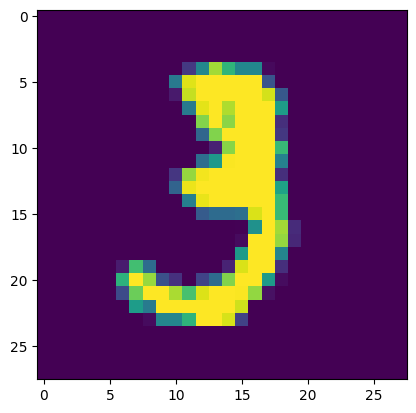

In [13]:
img_plot=plt.imshow(X_train[10])
plt.show()

In [14]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [22]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use the labels as it is or apply One hot encoding as well

**All the images should have same dimensions,i if they don't have then we have to perform resizing using Pillow**

In [23]:
#scaling the values (normalizing the data)
X_train = X_train/255 #since the values remains within the range of 0 to 1 hence it would be easier for the neural network to understand the values
X_test = X_test/255

In [24]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the neural network**  
RNN -> used with audio or text data  
CNN -> complex data like image data

In [25]:
#setting up the layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# compiling the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"])

In [34]:
#training the neural network model
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9953 - loss: 0.0131
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9951 - loss: 0.0135
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9957 - loss: 0.0121
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9961 - loss: 0.0116
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9962 - loss: 0.0114
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9963 - loss: 0.0106
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9965 - loss: 0.0105
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9966 - loss: 0.0093
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9956 - loss: 0.0151
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9966 - loss: 0.0109


**For the training data the accuracy comes out to be 99.66%**

Now let's find the accuracy for the test data

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9680 - loss: 0.2092


**For the test data the accuracy comes out to be 96.80%**

In [36]:
print(X_test.shape)

(10000, 28, 28)


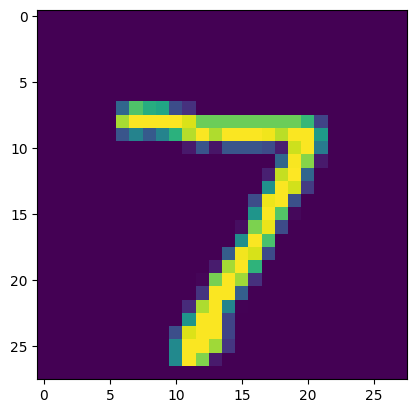

In [37]:
plt.imshow(X_test[0])
plt.show()

In [38]:
print(y_test[0])

7


In [39]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [40]:
print(y_pred.shape)

(10000, 10)


In [41]:
print(y_pred[0])

[4.6706830e-07 7.2119141e-04 4.8800264e-04 9.9946457e-01 1.7636702e-17
 5.1035965e-08 8.0058007e-29 1.0000000e+00 2.4904631e-04 4.5514831e-01]


model.predict() gives the prediction probability for each of the classes present in the label

In [43]:
#converting the prediction probablity to class label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [44]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

y_test -> true labels  
y_pred_label -> predicted labels

**Confusion Matrix**

In [45]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [46]:
print(conf_mat)

tf.Tensor(
[[ 966    1    2    0    1    2    3    2    2    1]
 [   0 1124    2    1    0    1    2    1    4    0]
 [   5    4 1001    8    2    1    2    7    2    0]
 [   0    0    8  975    1    7    0    5    5    9]
 [   0    1    5    1  954    2    5    2    2   10]
 [   2    3    0   15    2  858    5    1    5    1]
 [   4    3    2    1    4    5  937    0    2    0]
 [   0    6    8    5    2    0    1  997    2    7]
 [   6    4    3    7    4    9    1    4  928    8]
 [   1    2    0    2   20   10    1    3    2  968]], shape=(10, 10), dtype=int32)


Text(0.5, 25.722222222222214, 'Predicted Labels')

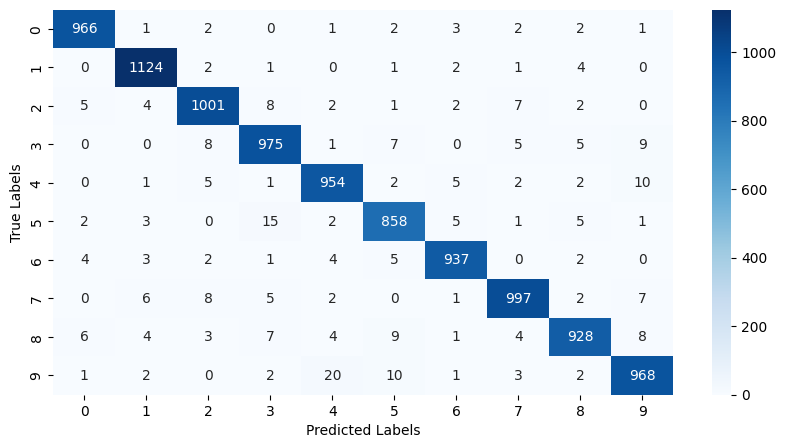

In [52]:
plt.figure(figsize = (10, 5))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a Predictive System**

Resize the image

In [99]:
input_image_path = '/content/three.png'
input_image = cv2.imread(input_image_path)

In [100]:
type(input_image)

numpy.ndarray

In [101]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [102]:
print(input_image.shape)

(318, 318, 3)


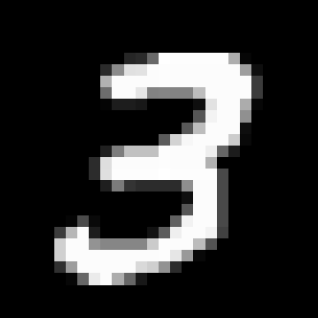

In [103]:
cv2_imshow(input_image)

In [104]:
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [105]:
greyscale.shape

(318, 318)

In [106]:
input_image_resize = cv2.resize(greyscale, (28, 28))

In [107]:
input_image_resize.shape

(28, 28)

In [108]:
cv2_imshow(input_image_resize)

In [109]:
input_image_resize = input_image_resize/255

In [110]:
input_image_resize

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [111]:
#this is a crucial step as it tells the neural network that we are working on a single image rather than a set of images
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [112]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[7.6633219e-30 3.4174201e-04 1.2193015e-08 1.0000000e+00 7.3678571e-31
  7.2662401e-01 0.0000000e+00 5.0905846e-10 7.5380835e-06 9.9970126e-01]]


In [113]:
np.argmax(input_prediction)

np.int64(3)

**Predictive System**

Path of the image to be predicted : /content/three.png


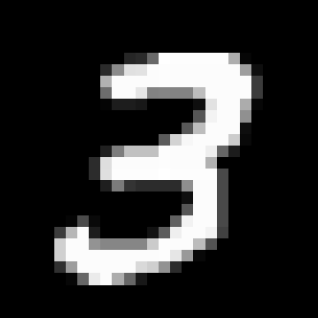

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The Handwritten digit is recognized as :  3


In [120]:
input_image_path = input('Path of the image to be predicted : ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(greyscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

print("The Handwritten digit is recognized as : ", np.argmax(input_prediction))